In [3]:
# Imports, load data, quick overview

import pandas as pd
import numpy as np

# 1. Loading the dataset
df = pd.read_csv('/content/online_shoppers_intention[1].csv')

# 2.Basic shape and first few rows
print("Shape (rows, columns):", df.shape)
display(df.head())


Shape (rows, columns): (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# 3. Data types and missing values
print("\n=== Data Info ===")
print(df.info())

# 4. Target variable distribution
print("\n=== Revenue value counts ===")
print(df['Revenue'].value_counts())
print("\nRevenue proportion:")
print(df['Revenue'].value_counts(normalize=True))


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tra

In [5]:
#  Preprocessing pipelines

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Recreating column lists
X = df.drop('Revenue', axis=1)
y = df['Revenue']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# 1. Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 2. Categorical preprocessingr
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

print("\nPreprocessor ready.")

Numeric columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Categorical columns: ['Month', 'VisitorType', 'Weekend']

Preprocessor ready.


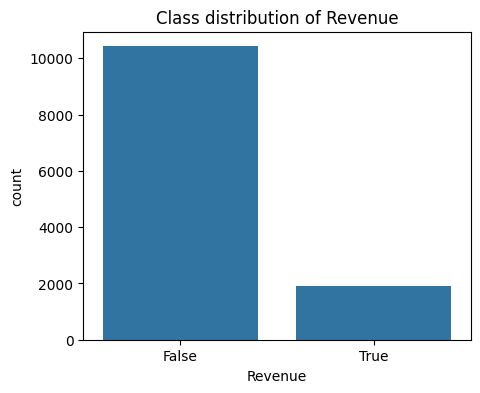

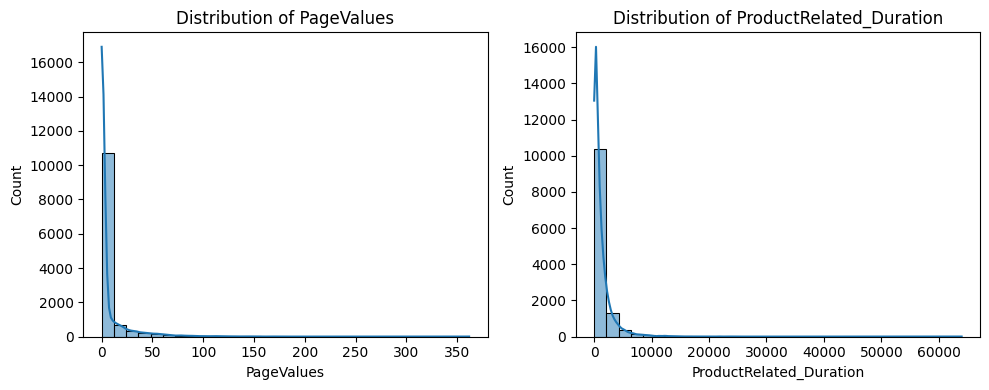

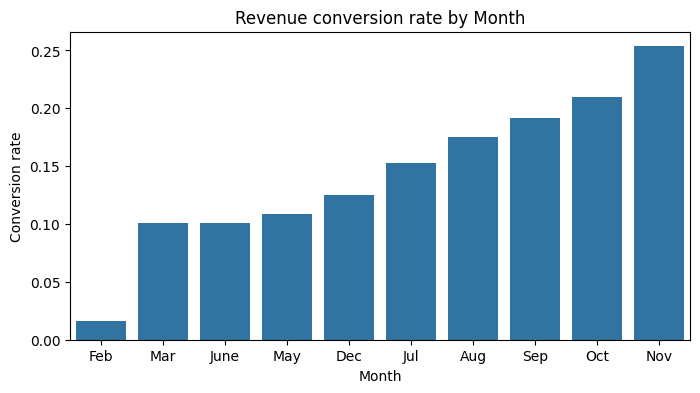

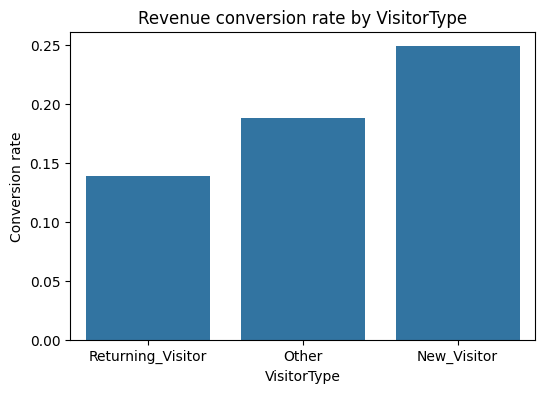

In [6]:
#  Basic EDA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Revenue')
plt.title('Class distribution of Revenue')
plt.show()

# 2. Important numeric feature distributions
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['PageValues'], bins=30, kde=True)
plt.title('Distribution of PageValues')

plt.subplot(1,2,2)
sns.histplot(df['ProductRelated_Duration'], bins=30, kde=True)
plt.title('Distribution of ProductRelated_Duration')
plt.tight_layout()
plt.show()

# 3. Conversion rate by Month
plt.figure(figsize=(8,4))
conv_by_month = df.groupby('Month')['Revenue'].mean().sort_values()
sns.barplot(x=conv_by_month.index, y=conv_by_month.values)
plt.ylabel('Conversion rate')
plt.title('Revenue conversion rate by Month')
plt.show()

# 4. Conversion rate by VisitorType
plt.figure(figsize=(6,4))
conv_by_type = df.groupby('VisitorType')['Revenue'].mean().sort_values()
sns.barplot(x=conv_by_type.index, y=conv_by_type.values)
plt.ylabel('Conversion rate')
plt.title('Revenue conversion rate by VisitorType')
plt.show()

In [7]:
#  Split data and define models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Features and target
X = df.drop('Revenue', axis=1)
y = df['Revenue'].astype(int)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

# Three classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42)
}


Train shape: (8631, 17)  Test shape: (3699, 17)


In [8]:
#  Train models and build results table

from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

results = []
fitted_models = {}

for name, clf in models.items():
    print(f"\n================ {name} ================")

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])

    pipe.fit(X_train, y_train)
    fitted_models[name] = pipe   # save for later use

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("ROC-AUC  :", auc)
    print("\nClassification report:\n", classification_report(y_test, y_pred))

    results.append([name, acc, prec, rec, f1, auc])

results_df = pd.DataFrame(results,
                          columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC"])
print("\n\n=== Summary results ===")
display(results_df)


================ Logistic Regression ================
Accuracy : 0.8794268721276021
Precision: 0.725
Recall   : 0.3548951048951049
F1-score : 0.4765258215962441
ROC-AUC  : 0.8915049613002922

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      3127
           1       0.72      0.35      0.48       572

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.70      3699
weighted avg       0.87      0.88      0.86      3699


================ Random Forest ================
Accuracy : 0.8978102189781022
Precision: 0.7309523809523809
Recall   : 0.5367132867132867
F1-score : 0.6189516129032258
ROC-AUC  : 0.9179778088876266

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.73      0.54      0.62       572

    accuracy                           0.90      3699
   macro avg  

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.879427,0.725000,0.354895,0.476526,0.891505
1,Random Forest,0.897810,0.730952,0.536713,0.618952,0.917978
2,SVM (RBF),0.887537,0.708556,0.463287,0.560254,0.869388


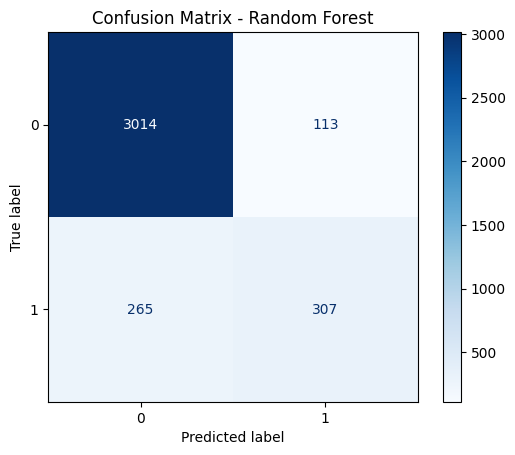

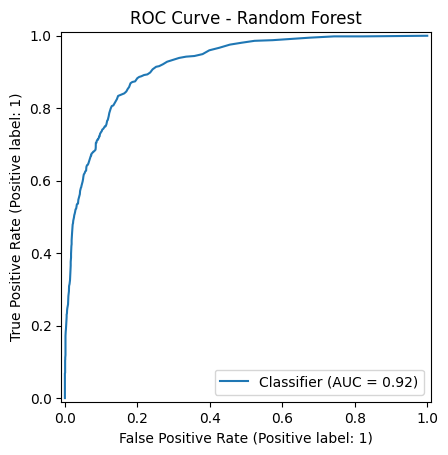

In [10]:
# Confusion matrix and ROC curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

best_model_name = "Random Forest"   # change if another is best
best_model = fitted_models[best_model_name]

# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# 2. ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title(f'ROC Curve - {best_model_name}')
plt.show()
